In [1]:
# import glob

# filenames = glob('states*')
# for files in filenames:
#     print(files)

In [2]:
# import glob
# import pandas as pd

# path =r'E:\1-ASML-CGL-Sunny\18-Izhar & ASML Planner_CGL\Izhar Const_3rd Planner-ASML - CGL Plant_22_9_18\Practice\ASSIGNMENTS\Assignment2-Pandas\Assignment'
# filenames = glob(.glob(path + )"/*.csv")
# dataFrames = []

# for filename in filenames:
#     dataFrames.append(pd.read_csv(filename))


# us_census = pd.concat(dataFrames)
# us_census
# us_census.head(87)

# ***PART 1***

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Open some of the census csv files in the navigator. How are they named? What kind of information do they hold? Will they help us make this graph?

2.
It will be easier to inspect this data once we have it in a DataFrame. You can’t even call .head() on these csvs! How are you supposed to read them?

Using glob, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like us_census.

In [3]:
import pandas as pd 
import numpy as np 
import pickle

x = []
y = 0
for a in range(10):
    d = 'states'+ str(y) + '.csv'
    z = pd.DataFrame(pd.read_csv(d))
    x.append(z)
    y += 1
us_census = pd.concat(x)
us_census

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,$64657.801787164906,2648667M_2630239F
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,$76146.5605875153,1751607M_1841615F
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,$61827.97663551402,448413M_478041F
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,$75466.36363636363,306674M_340810F


3.
Look at the .columns and the .dtypes of the us_census DataFrame. Are those datatypes going to hinder you as you try to make histograms?


In [4]:
us_census.dtypes, us_census.columns

(Unnamed: 0     int64
 State         object
 TotalPop       int64
 Hispanic      object
 White         object
 Black         object
 Native        object
 Asian         object
 Pacific       object
 Income        object
 GenderPop     object
 dtype: object,
 Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
        'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
       dtype='object'))

4.
Look at the .head() of the DataFrame so that you can understand why some of these dtypes are objects instead of integers or floats.

Start to make a plan for how to convert these columns into the right types for manipulation.

Regex to the Rescue

In [5]:
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,$43296.35860306644,2341093M_2489527F
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,$70354.74390243902,384160M_349215F
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,$54207.82095490716,3299088M_3342840F
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,$41935.63396778917,1451913M_1506295F
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,$67264.78230266465,19087135M_19334329F


5. Use regex to turn the Income column into a format that is ready for conversion into a numerical type.

In [6]:
us_census['Income'] = us_census['Income'].str.replace("$","", regex = True)
us_census['Income'] = pd.to_numeric(us_census['Income'])

6. Look at the GenderPop column. We are going to want to separate this into two columns, the Men column, and the Women column.

Split the column into those two new columns using str.split and separating out those results.

In [7]:
us_census[['the Men', 'the Women']] = us_census['GenderPop'].str.split("_", expand=True)

7. Convert both of the columns into numerical datatypes.

There is still an M or an F character in each entry! We should remove those before we convert.


In [8]:
us_census['the Women'] = us_census['the Women'].str.replace("F", "", regex = True)
us_census['the Women'] = pd.to_numeric(us_census['the Women'])
us_census['the Men'] = us_census['the Men'].str.replace("M","", regex = True)
us_census['the Men'] = pd.to_numeric(us_census['the Men'])
us_census.head()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,the Men,the Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0


8.
Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you’ve wasted your whole day cleaning your data with no results to show!

Use matplotlib to make a scatterplot!

plt.scatter(the_women_column, the_income_column) 
Remember to call plt.show() to see the graph!

In [9]:
# import pillow
import matplotlib.pyplot as plt
import PIL


plt.scatter(us_census['the Women'],us_census['Income'])
plt.show()

ModuleNotFoundError: No module named 'PIL'

9.
Did you get an error? These monstrous csv files probably have nan values in them! Print out your column with the number of women per state to see.

We can fill in those nans by using pandas’ .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [29]:
print(us_census['the Women'])

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5           NaN
0           NaN
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1           NaN
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: the Women, dtype: float64


In [30]:
us_census['the Women'] = us_census['the Women'].fillna(us_census['TotalPop'] - us_census['the Men'])
us_census['the Women']

0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
5     2630239.0
0     2630239.0
1     1841615.0
2      478041.0
3      340810.0
4    10045763.0
5     5123362.0
0     5123362.0
1      696428.0
2      806083.0
3     6556862.0
4     3333382.0
5     1558931.0
0     1558931.0
1     1453125.0
2     2233145.0
3     2364097.0
4      679019.0
5     3057895.0
0     3057895.0
1     3455936.0
2     5038598.0
3     2727005.0
4     1536358.0
5     3081445.0
0     3081445.0
1      504536.0
2      939759.0
3     1390901.0
4      670717.0
5     4561386.0
0     4561386.0
1     1051703.0
2    10131373.0
3     5049925.0
4      353677.0
5     5913084.0
0     5913084.0
1     1942789.0
2     1990780.0
3     6534215.0
4     1869213.0
5      543273.0
0      543273.0
1     2455167.0
2      419713.0
3     3331859.0
4    13367298.0
5     1444150.0
0     1444150.0
1      318031.0
2     4195682.0
3     3497739.0
4      937789.0
5     2890732.0
Name: the Women, dtype: float64

10.
We forgot to check for duplicates! Use .duplicated() on your census DataFrame to see if we have duplicate rows in there.


In [31]:
us_census.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

11.
Drop those duplicates using the .drop_duplicates() function.

In [32]:
us_census.drop_duplicates()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,the Men,the Women
0,0,Alabama,4830620,3.7516156462584975%,61.878656462585%,31.25297619047618%,0.4532312925170065%,1.0502551020408146%,0.03435374149659865%,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909580838323351%,60.910179640718574%,2.8485029940119775%,16.39101796407186%,5.450299401197604%,1.0586826347305378%,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921052631502%,57.120000000000026%,3.8509868421052658%,4.35506578947368%,2.876578947368419%,0.16763157894736833%,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474452554738%,71.13781021897813%,18.968759124087573%,0.5229197080291965%,1.1423357664233578%,0.14686131386861315%,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291874687968054%,40.21578881677474%,5.677396405391911%,0.40529206190713685%,13.052234148776776%,0.35141038442336353%,67264.782303,19087135M_19334329F,19087135,19334329.0
5,5,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
0,0,Colorado,5278906,20.78438003220608%,69.89557165861504%,3.546376811594201%,0.5738325281803548%,2.661996779388082%,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.604830917874388%,67.6770531400966%,10.34806763285027%,0.12620772946859898%,4.021980676328502%,0.018599033816425123%,76146.560588,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.82476635514019%,64.63271028037383%,20.743925233644834%,0.25981308411214965%,3.2686915887850483%,NaN,61827.976636,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.165921787709499%,33.103910614525134%,51.77653631284915%,0.20055865921787713%,3.3832402234636865%,0.029608938547486034%,75466.363636,306674M_340810F,306674,340810.0


12.
Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

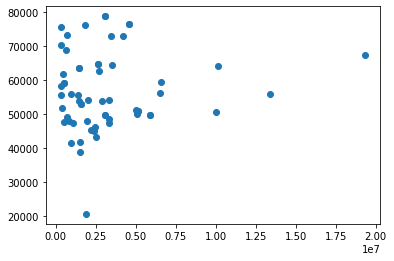

In [33]:
plt.scatter(us_census['the Women'],us_census['Income'])
plt.show()

13.
Now, your boss wants you to make a bunch of histograms out of the race data that you have. Look at the .columns again to see what the race categories are.

In [34]:
us_census.columns

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'the Men',
       'the Women'],
      dtype='object')

14.
Try to make a histogram for each one!

You will have to get the columns into numerical format, and those percentage signs will have to go.

Don’t forget to fill the nan values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn’t hurt to check for duplicates again.

Get Creative

In [35]:
# Hispanic
us_census['Hispanic'] = us_census['Hispanic'].str.replace("%","", regex = True)
us_census['Hispanic'] = pd.to_numeric(us_census['Hispanic'])
# White
us_census['White'] = us_census['White'].str.replace("%","", regex = True)
us_census['White'] = pd.to_numeric(us_census['White'])
# Black
us_census['Black'] = us_census['Black'].str.replace("%","", regex = True)
us_census['Black'] = pd.to_numeric(us_census['Black'])
# Native
us_census['Native'] = us_census['Native'].str.replace("%","", regex = True)
us_census['Native'] = pd.to_numeric(us_census['Native'])
# Asian
us_census['Asian'] = us_census['Asian'].str.replace("%","", regex = True)
us_census['Asian'] = pd.to_numeric(us_census['Asian'])
# Pacific
us_census['Pacific'] = us_census['Pacific'].str.replace("%","", regex = True)
us_census['Pacific'] = pd.to_numeric(us_census['Pacific'])

In [36]:
us_census.duplicated()
us_census.drop_duplicates()

,Unnamed: 0,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,the Men,the Women
0,0,Alabama,4830620,3.751616,61.878656,31.252976,0.453231,1.050255,0.034354,43296.358603,2341093M_2489527F,2341093,2489527.0
1,1,Alaska,733375,5.909581,60.910180,2.848503,16.391018,5.450299,1.058683,70354.743902,384160M_349215F,384160,349215.0
2,2,Arizona,6641928,29.565921,57.120000,3.850987,4.355066,2.876579,0.167632,54207.820955,3299088M_3342840F,3299088,3342840.0
3,3,Arkansas,2958208,6.215474,71.137810,18.968759,0.522920,1.142336,0.146861,41935.633968,1451913M_1506295F,1451913,1506295.0
4,4,California,38421464,37.291875,40.215789,5.677396,0.405292,13.052234,0.351410,67264.782303,19087135M_19334329F,19087135,19334329.0
5,5,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
0,0,Colorado,5278906,20.784380,69.895572,3.546377,0.573833,2.661997,NaN,64657.801787,2648667M_2630239F,2648667,2630239.0
1,1,Connecticut,3593222,15.604831,67.677053,10.348068,0.126208,4.021981,0.018599,76146.560588,1751607M_1841615F,1751607,1841615.0
2,2,Delaware,926454,8.824766,64.632710,20.743925,0.259813,3.268692,NaN,61827.976636,448413M_478041F,448413,478041.0
3,3,District of Columbia,647484,9.165922,33.103911,51.776536,0.200559,3.383240,0.029609,75466.363636,306674M_340810F,306674,340810.0


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


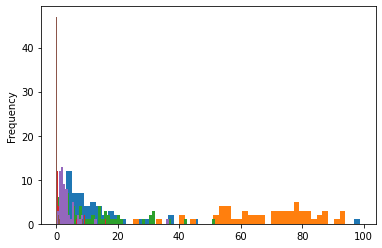

In [38]:
print(us_census['Hispanic'].plot.hist(bins=20))
print(us_census['White'].plot.hist(bins=20))
print(us_census['Black'].plot.hist(bins=20))
print(us_census['Native'].plot.hist(bins=20))
print(us_census['Asian'].plot.hist(bins=20))
print(us_census['Pacific'].plot.hist(bins=20))

15.
Phew. You’ve definitely impressed your boss on your first day of work.

But is there a way you really convey the power of pandas and Python over the drudgery of csv and Excel?

Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you’ve been searching for.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


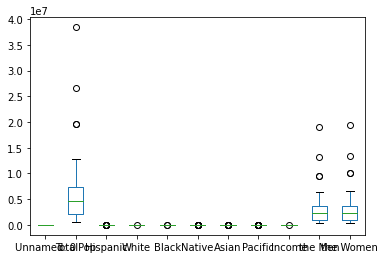

In [45]:
us_census.plot.box()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35946f1c10>,
      dtype=object)

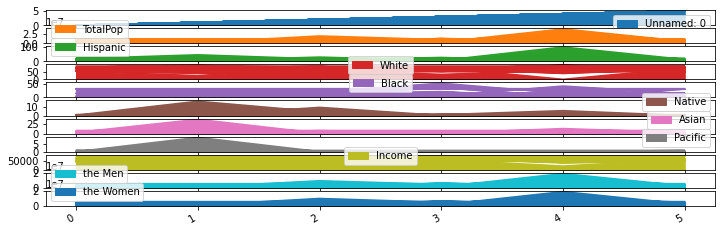

In [46]:
us_census.plot.area(figsize=(12, 4), subplots=True)

# ***PART 2***

**LEARN DATA ANALYSIS WITH PANDAS**
Petal Power Inventory
You’re the lead data analyst for a chain of gardening stores called Petal Power. Help them analyze their inventory!

1.
Data for all of the locations of Petal Power is in the file inventory.csv. Load the data into a DataFrame called inventory.


In [2]:
import numpy as np 
import pandas as pd 

inventory = pd.DataFrame(pd.read_csv('inventory.csv'))

2.
Inspect the first 10 rows of inventory.

In [3]:
inventory.head(10)

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


3.
The first 10 rows represent data from your Staten Island location. Select these rows and save them to staten_island.


In [4]:
staten_island = inventory[:10]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


4.
A customer just emailed you asking what products are sold at your Staten Island location. Select the column product_description from staten_island and save it to the variable product_request.

In [5]:
product_request = inventory['product_description']
product_request

0                          daisy
1                     calla lily
2                         tomato
3                           rake
4                    wheelbarrow
5                          spade
6                  insect killer
7                    weed killer
8     20 inch terracotta planter
9         8 inch plastic planter
10                         daisy
11                    calla lily
12                        tomato
13                          rake
14                   wheelbarrow
15                         spade
16                 insect killer
17                   weed killer
18    20 inch terracotta planter
19        8 inch plastic planter
20                         daisy
21                    calla lily
22                        tomato
23                          rake
24                   wheelbarrow
25                         spade
26                 insect killer
27                   weed killer
28    20 inch terracotta planter
Name: product_description, dtype: object

5.
Another customer emails to ask what types of seeds are sold at the Brooklyn location.

Select all rows where location is equal to Brooklyn and product_type is equal to seeds and save them to the variable seed_request

In [8]:
seed_request =(inventory['location']=='Brooklyn') & (inventory['product_type']=='seeds')
seed_request = inventory[seed_request]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


# ***Inventory***
6.
Add a column to inventory called in_stock which is True if quantity is greater than 0 and False if quantity equals 0.


In [12]:
inventory['in_stock'] = inventory['quantity'] > 0
inventory['in_stock']

0      True
1      True
2      True
3      True
4     False
5      True
6      True
7      True
8     False
9      True
10     True
11    False
12    False
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27     True
28     True
Name: in_stock, dtype: bool

7.
Petal Power wants to know how valuable their current inventory is.

Create a column called total_value that is equal to price multiplied by quantity.


In [13]:
inventory['total_value'] = inventory['price'] * inventory['quantity']
inventory['total_value']

0       27.96
1      919.54
2     1189.15
3       55.96
4        0.00
5     1859.07
6      961.26
7      191.92
8        0.00
9      211.47
10     349.50
11       0.00
12       0.00
13     209.85
14    7379.18
15     719.64
16    1039.20
17    1823.24
18      89.95
19     103.74
20     398.43
21    1899.05
22     629.55
23     293.79
24    8819.02
25     519.74
26       0.00
27     383.84
28    1565.13
Name: total_value, dtype: float64

8.
The Marketing department wants a complete description of each product for their catalog.

The following lambda function combines product_type and product_description into a single string:

combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)
Paste this function into script.py.

In [17]:

combine_lambda = lambda row:'{} - {}'.format(row.product_type, row.product_description) 


9.
Using combine_lambda, create a new column in inventory called full_description that has the complete description of each product.


In [21]:
inventory['full_description'] = combine_lambda(inventory)

In [22]:
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,0 seeds\n1 seeds\n2 ...
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,0 seeds\n1 seeds\n2 ...
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,0 seeds\n1 seeds\n2 ...
3,Staten Island,garden tools,rake,4,13.99,True,55.96,0 seeds\n1 seeds\n2 ...
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,0 seeds\n1 seeds\n2 ...
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,0 seeds\n1 seeds\n2 ...
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,0 seeds\n1 seeds\n2 ...
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,0 seeds\n1 seeds\n2 ...
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,0 seeds\n1 seeds\n2 ...
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,0 seeds\n1 seeds\n2 ...
